# Helpers

In [ ]:
import pandas as pd
import string

def calculate_target_word_frequency(df, target_word, text_column="text"):
    total_count = 0

    for doc in df[text_column]:
        s_no_punctuation = ''.join(ch for ch in doc if ch not in string.punctuation).lower()
        total_count += s_no_punctuation.count(target_word.lower())

    return total_count



def generate_speaker_and_general_corpus_within_timeframe(df, speaker_dict, name):
    df_copy = df.copy()
    speaker_corp = speaker_dict[name]

    speaker_years = speaker_corp['date'].dt.year.unique()
    print('speaker years', speaker_years)

    # Filtrer ut rader med andre navn, men som er i samme år
    general_corp = df_copy[
        (df_copy['name'] != name) &
        (df_copy['date'].dt.year.isin(speaker_years))
    ]

    return general_corp, speaker_corp

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download('punkt_tab')

def count_total_tokens(df, text_column="text"):
    total_tokens = 0
    for doc in df[text_column]:
        tokens = word_tokenize(str(doc))
        total_tokens += len(tokens)
    return total_tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def normalize_frequency(word_count, total_tokens):
    return (word_count / total_tokens)*1000

In [ ]:
import numpy as np

def compute_frq_d(ref_freq, foc_freq):
    return abs(np.log(ref_freq) - np.log(foc_freq))

def compute_frq_m(ref_freq, foc_freq):
    return min(np.log(ref_freq), np.log(foc_freq))

In [ ]:
import numpy as np

def print_rank(system_scores):
    sorted_list = sorted(system_scores, key=lambda x: x[1], reverse=True)
    rank = [x[0] for x in sorted_list]
    print(rank)

In [ ]:
from scipy.stats import spearmanr

def spearman_corr_by_speaker(system_ranked, freq_metric_by_speaker):
    speaker_ids = [entry[1] for entry in system_ranked]
    predicted_scores = [entry[2] for entry in system_ranked]
    freq_values = [freq_metric_by_speaker[sid] for sid in speaker_ids]

    r, _ = spearmanr(predicted_scores, freq_values)
    return r

In [ ]:
from scipy.stats import spearmanr

def spearman_systems(gold_rank, other_rank):
    gold = [x[1] for x in gold_rank]
    other = [x[1] for x in other_rank]
    corr, _ = spearmanr(gold, other)
    return corr

# Load data

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
from datasets import load_dataset

ds_n = load_dataset("trymtv/norwegian-parliament-speeches", split="train")
ds_n

df_n = ds_n.to_pandas()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/455 [00:00<?, ?B/s]

parliament_speeches.csv:   0%|          | 0.00/535M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/274204 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

df_n['date'] = pd.to_datetime(df_n['date'])
df_n['time_group'] = df_n['date'].apply(lambda x: 1 if x.year >= 1998 and x.year <= 2010 else 2)
df_n[:5]

,name,sex,party,text,date,time_group
0,Laila Dåvøy,F,Kristelig Folkeparti,Jeg har gleden av å fremme et representantfors...,2013-04-17,2
1,Laila Dåvøy,F,Kristelig Folkeparti,La meg komme med et femte eksempel på sendrekt...,2013-04-17,2
2,Dagrun Eriksen,F,Kristelig Folkeparti,Det er en ære å fremme et forslag på vegne av ...,2013-04-17,2
3,Dagrun Eriksen,F,Kristelig Folkeparti,Det er ikke tvil om at veiprosjekter ikke har ...,2013-04-17,2
4,Dagrun Eriksen,F,Kristelig Folkeparti,Jeg har et spørsmål til kirkeministeren. Kirke...,2013-04-17,2


In [ ]:
tg1_df = df_n[df_n['time_group'] == 1]
tg2_df = df_n[df_n['time_group'] == 2]

In [ ]:
sub_corpora_n = {name: group for name, group in df_n.groupby('name')}

In [ ]:
general_corp_speaker1, speaker1_corp = generate_speaker_and_general_corpus_within_timeframe(df_n, sub_corpora_n, 'Frank Bakke-Jensen')
general_corp_speaker2, speaker2_corp = generate_speaker_and_general_corpus_within_timeframe(df_n, sub_corpora_n, 'Rigmor Andersen Eide')
general_corp_speaker3, speaker3_corp = generate_speaker_and_general_corpus_within_timeframe(df_n, sub_corpora_n, 'Rasmus Hansson')
general_corp_speaker4, speaker4_corp = generate_speaker_and_general_corpus_within_timeframe(df_n, sub_corpora_n, 'Erna Solberg')

speaker years [2013 2020 2019 2015 2012 2021 2010 2018 2014 2017 2009 2016 2011]
speaker years [2013 2001 2003 2015 2002 2012 2010 2014 2017 2009 2016 2011 2004]
speaker years [2013 2015 2021 2014 2017 2016 2022]
speaker years [2013 1999 2020 1998 2000 2019 2001 2003 2015 2002 2012 2021 2010 2018
 2014 2017 2009 2008 2016 2011 2022 2004 2007 2005 2006]


# Main

In [ ]:
tw = 'bærekraft'

In [ ]:
"""
tg1_freq = calculate_target_word_frequency(tg1_df, tw)
tg2_freq = calculate_target_word_frequency(tg2_df, tw)
speaker1_freq = calculate_target_word_frequency(speaker1_corp, tw)
speaker2_freq = calculate_target_word_frequency(speaker2_corp, tw)
speaker3_freq = calculate_target_word_frequency(speaker3_corp, tw)
speaker4_freq = calculate_target_word_frequency(speaker4_corp, tw)
gs1_freq = calculate_target_word_frequency(general_corp_speaker1, tw)
gs2_freq = calculate_target_word_frequency(general_corp_speaker2, tw)
gs3_freq = calculate_target_word_frequency(general_corp_speaker3, tw)
gs4_freq = calculate_target_word_frequency(general_corp_speaker4, tw)
"""

'\ntg1_freq = calculate_target_word_frequency(tg1_df, tw)\ntg2_freq = calculate_target_word_frequency(tg2_df, tw)\nspeaker1_freq = calculate_target_word_frequency(speaker1_corp, tw)\nspeaker2_freq = calculate_target_word_frequency(speaker2_corp, tw)\nspeaker3_freq = calculate_target_word_frequency(speaker3_corp, tw)\nspeaker4_freq = calculate_target_word_frequency(speaker4_corp, tw)\ngs1_freq = calculate_target_word_frequency(general_corp_speaker1, tw)\ngs2_freq = calculate_target_word_frequency(general_corp_speaker2, tw)\ngs3_freq = calculate_target_word_frequency(general_corp_speaker3, tw)\ngs4_freq = calculate_target_word_frequency(general_corp_speaker4, tw)\n'

In [ ]:
tg1_freq = 3182
tg2_freq = 7783
speaker1_freq = 224
speaker2_freq = 142
speaker3_freq = 217
speaker4_freq = 227
gs1_freq = 8049
gs2_freq = 5828
gs3_freq = 4361
gs4_freq = 10738

print('tg1_freq', tg1_freq)
print('tg2_freq', tg2_freq)
print('speaker1_freq', speaker1_freq)
print('speaker2_freq', speaker2_freq)
print('speaker3_freq', speaker3_freq)
print('speaker4_freq', speaker4_freq)
print('gs1_freq', gs1_freq)
print('gs2_freq', gs2_freq)
print('gs3_freq', gs3_freq)
print('gs4_freq', gs4_freq)

tg1_freq 3182
tg2_freq 7783
speaker1_freq 224
speaker2_freq 142
speaker3_freq 217
speaker4_freq 227
gs1_freq 8049
gs2_freq 5828
gs3_freq 4361
gs4_freq 10738


In [ ]:
"""
tg1_total = count_total_tokens(tg1_df)
print('tg1_total', tg1_total)

tg2_total = count_total_tokens(tg2_df)
print('tg2_total', tg2_total)

speaker1_total = count_total_tokens(speaker1_corp)
print('speaker1_total', speaker1_total)

speaker2_total = count_total_tokens(speaker2_corp)
print('speaker2_total', speaker2_total)

speaker3_total = count_total_tokens(speaker3_corp)
print('speaker3_total', speaker3_total)

speaker4_total = count_total_tokens(speaker4_corp)
print('speaker4_total', speaker4_total)

gs1_total = count_total_tokens(general_corp_speaker1)
print('gs1_total', gs1_total)

gs2_total = count_total_tokens(general_corp_speaker2)
print('gs2_total', gs2_total)

gs3_total = count_total_tokens(general_corp_speaker3)
print('gs3_total', gs3_total)

gs4_total = count_total_tokens(general_corp_speaker4)
print('gs4_total', gs4_total)
"""

"\ntg1_total = count_total_tokens(tg1_df)\nprint('tg1_total', tg1_total)\n\ntg2_total = count_total_tokens(tg2_df)\nprint('tg2_total', tg2_total)\n\nspeaker1_total = count_total_tokens(speaker1_corp)\nprint('speaker1_total', speaker1_total)\n\nspeaker2_total = count_total_tokens(speaker2_corp)\nprint('speaker2_total', speaker2_total)\n\nspeaker3_total = count_total_tokens(speaker3_corp)\nprint('speaker3_total', speaker3_total)\n\nspeaker4_total = count_total_tokens(speaker4_corp)\nprint('speaker4_total', speaker4_total)\n\ngs1_total = count_total_tokens(general_corp_speaker1)\nprint('gs1_total', gs1_total)\n\ngs2_total = count_total_tokens(general_corp_speaker2)\nprint('gs2_total', gs2_total)\n\ngs3_total = count_total_tokens(general_corp_speaker3)\nprint('gs3_total', gs3_total)\n\ngs4_total = count_total_tokens(general_corp_speaker4)\nprint('gs4_total', gs4_total)\n"

In [ ]:
tg1_total = 46012347
tg2_total = 46855159
speaker1_total = 296784
speaker2_total = 153434
speaker3_total = 259311
speaker4_total = 1277214
gs1_total = 53154807
gs2_total = 50956027
gs3_total = 25817539
gs4_total = 91590292

In [ ]:

print('--------General use---------')
gs1_freq_norm = normalize_frequency(gs1_freq, gs1_total)
print(gs1_freq_norm)

gs2_freq_norm = normalize_frequency(gs2_freq, gs2_total)
print(gs2_freq_norm)

gs3_freq_norm = normalize_frequency(gs3_freq, gs3_total)
print(gs3_freq_norm)

gs4_freq_norm = normalize_frequency(gs4_freq, gs4_total)
print(gs4_freq_norm)


print('--------Speaker use---------')
speaker1_freq_norm = normalize_frequency(speaker1_freq, speaker1_total)
print(speaker1_freq_norm)

speaker2_freq_norm = normalize_frequency(speaker2_freq, speaker2_total)
print(speaker2_freq_norm)

speaker3_freq_norm = normalize_frequency(speaker3_freq, speaker3_total)
print(speaker3_freq_norm)

speaker4_freq_norm = normalize_frequency(speaker4_freq, speaker4_total)
print(speaker4_freq_norm)

--------General use---------
0.15142562741315194
0.11437312410561365
0.16891617748694018
0.11723949957491128
--------Speaker use---------
0.7547576688770284
0.9254793592033057
0.836832992044302
0.17773059174108646


In [ ]:
import numpy as np
log_speaker1_freq = np.log(speaker1_freq_norm)
log_speaker2_freq = np.log(speaker2_freq_norm)
log_speaker3_freq = np.log(speaker3_freq_norm)
log_speaker4_freq = np.log(speaker4_freq_norm)

log_gs1_freq = np.log(gs1_freq_norm)
log_gs2_freq = np.log(gs2_freq_norm)
log_gs3_freq = np.log(gs3_freq_norm)
log_gs4_freq = np.log(gs4_freq_norm)

print('log speaker1_freq' , log_speaker1_freq)
print('log speaker2_freq' , log_speaker2_freq)
print('log speaker3_freq' , log_speaker3_freq)
print('log speaker4_freq' , log_speaker4_freq)

print('log gs1_freq', log_gs1_freq)
print('log gs2_freq', log_gs2_freq)
print('log gs3_freq', log_gs3_freq)
print('log gs4_freq', log_gs4_freq)

log speaker1_freq -0.2813585496292827
log speaker2_freq -0.07744344953678209
log speaker3_freq -0.17813076000950484
log speaker4_freq -1.7274864047773812
log gs1_freq -1.887660682731589
log gs2_freq -2.168289156783348
log gs3_freq -1.7783526783049246
log gs4_freq -2.14353643153041


In [ ]:
frq_d_speaker1 = compute_frq_d(gs1_freq_norm, speaker1_freq_norm)
frq_m_speaker1 = compute_frq_m(gs1_freq_norm, speaker1_freq_norm)
print('frq_d_speaker1', frq_d_speaker1)
print('frq_m_speaker1', frq_m_speaker1)

frq_d_speaker2 = compute_frq_d(gs2_freq_norm, speaker2_freq_norm)
frq_m_speaker2 = compute_frq_m(gs2_freq_norm, speaker2_freq_norm)
print('frq_d_speaker2', frq_d_speaker2)
print('frq_m_speaker2', frq_m_speaker2)

frq_d_speaker3 = compute_frq_d(gs3_freq_norm, speaker3_freq_norm)
frq_m_speaker3 = compute_frq_m(gs3_freq_norm, speaker3_freq_norm)
print('frq_d_speaker3', frq_d_speaker3)
print('frq_m_speaker3', frq_m_speaker3)

frq_d_speaker4 = compute_frq_d(gs4_freq_norm, speaker4_freq_norm)
frq_m_speaker4 = compute_frq_m(gs4_freq_norm, speaker4_freq_norm)
print('frq_d_speaker4', frq_d_speaker4)
print('frq_m_speaker4', frq_m_speaker4)

frq_d_speaker1 1.6063021331023062
frq_m_speaker1 -1.887660682731589
frq_d_speaker2 2.090845707246566
frq_m_speaker2 -2.168289156783348
frq_d_speaker3 1.6002219182954198
frq_m_speaker3 -1.7783526783049246
frq_d_speaker4 0.41605002675302893
frq_m_speaker4 -2.14353643153041


In [ ]:
frq_d = [
    (1, frq_d_speaker1),
    (2, frq_d_speaker2),
    (3, frq_d_speaker3),
    (4, frq_d_speaker4)
]

frq_m = [
    (1, frq_m_speaker1),
    (2, frq_m_speaker2),
    (3, frq_m_speaker3),
    (4, frq_m_speaker4)
]

In [ ]:
ft_jsd_values = [
    (1, np.float64(0.44921871324465645)),
    (2, np.float64(0.3616129244248057)),
    (3, np.float64(0.3546079707822841)),
    (4, np.float64(0.45164293828621116))
]


ft_corr_frq_d = spearman_systems(ft_jsd_values, frq_d)
print('ft_corr_frq_d', ft_corr_frq_d)

ft_corr_frq_m = spearman_systems(ft_jsd_values, frq_m)
print('ft_corr_frq_m', ft_corr_frq_m)

print_rank(ft_jsd_values)


ft_corr_frq_d -0.39999999999999997
ft_corr_frq_m -0.39999999999999997
[4, 1, 2, 3]


In [ ]:
pt_jsd_values = [
    (1, np.float64(0.5024905442575683)),
    (2, np.float64(0.29100035275770453)),
    (3,  np.float64(0.31448108089053484)),
    (4, np.float64(0.39782780640754384))
]

pt_corr_frq = spearman_systems(pt_jsd_values, frq_d)
print('pt_corr_frq', pt_corr_frq)

pt_corr_frq_m = spearman_systems(pt_jsd_values, frq_m)
print('pt_corr_frq_m', pt_corr_frq_m)

print_rank(pt_jsd_values)

pt_corr_frq -0.39999999999999997
pt_corr_frq_m 0.39999999999999997
[1, 4, 3, 2]


In [ ]:
tm_jsd_values = [
    (1, np.float64(0.7631599710096147)),
    (2, np.float64(0.784756097847314)),
    (3, np.float64(0.8268549337358913)),
    (4, np.float64(0.8152904133872028))

]

tm_jsd_corr_frq_d = spearman_systems(tm_jsd_values, frq_d)
print('tm_jsd_corr_frq_d', tm_jsd_corr_frq_d)

tm_jsd_corr_frq_m = spearman_systems(tm_jsd_values, frq_m)
print('tm_jsd_corr_frq_m', tm_jsd_corr_frq_m)

print_rank(tm_jsd_values)

tm_jsd_corr_frq_d -0.6000000000000001
tm_jsd_corr_frq_m 0.39999999999999997
[3, 4, 2, 1]


In [ ]:
tm_novelty_values = [
    (1, 120.0),
    (2, 60.0),
    (3, 130.0),
    (4, 128,0)
]

tm_novelty_corr_frq_d = spearman_systems(tm_novelty_values, frq_d)
print('tm_novelty_corr_frq_d', tm_novelty_corr_frq_d)

tm_novelty_corr_frq_m = spearman_systems(tm_novelty_values, frq_m)
print('tm_novelty_corr_frq_m', tm_novelty_corr_frq_m)

print_rank(tm_novelty_values)

tm_novelty_corr_frq_d -0.7999999999999999
tm_novelty_corr_frq_m 0.7999999999999999
[3, 4, 1, 2]


In [ ]:
freq_basel_values = [
    (1, 0.002238805970149256),
    (2, 0.0006983240223463714),
    (3, 0.0005882352941176464),
    (4, 0.0006345177664974604)
]

freq_basel_corr_frq_d = spearman_systems(freq_basel_values, frq_d)
print('freq_basel_corr_frq_d', freq_basel_corr_frq_d)

freq_basel_corr_frq_m = spearman_systems(freq_basel_values, frq_m)
print('freq_basel_corr_frq_m', freq_basel_corr_frq_m)

print_rank(freq_basel_values)

freq_basel_corr_frq_d 0.6000000000000001
freq_basel_corr_frq_m -0.39999999999999997
[1, 2, 4, 3]


In [ ]:
count_basel_values = [
    (1, np.float64(0.15392036905637763)),
    (2, np.float64(0.08998417915975176)),
    (3, np.float64(0.07253735996962529)),
    (4, np.float64(0.08993271551999393))
]

count_basel_corr_frq_d = spearman_systems(count_basel_values, frq_d)
print('count_basel_corr_frq_d', count_basel_corr_frq_d)

count_basel_corr_frq_m = spearman_systems(count_basel_values, frq_m)
print('count_basel_corr_frq_m', count_basel_corr_frq_m)

print_rank(count_basel_values)

count_basel_corr_frq_d 0.6000000000000001
count_basel_corr_frq_m -0.39999999999999997
[1, 2, 4, 3]


In [ ]:
pt_apd_values = [
    (1, 0.21373258741378562),
    (2, 0.21893470070994883),
    (3, 0.20913882849119797),
    (4, 0.2134432500436538)
]

pt_apd_corr_frq_d = spearman_systems(pt_apd_values, frq_d)
print('pt_apd_corr_frq_d', pt_apd_corr_frq_d)

pt_apd_corr_frq_m = spearman_systems(pt_apd_values, frq_m)
print('pt_apd_corr_frq_m', pt_apd_corr_frq_m)

print_rank(pt_apd_values)

pt_apd_corr_frq_d 0.7999999999999999
pt_apd_corr_frq_m -0.7999999999999999
[2, 1, 4, 3]


In [ ]:
ft_apd_values = [
    (1, 0.2447261262153447),
    (2, 0.2526628800535178),
    (3, 0.24530404686352136),
    (4, 0.25772409003511876)
]

ft_apd_corr_frq_d = spearman_systems(ft_apd_values, frq_d)
print('ft_apd_corr_frq_d', ft_apd_corr_frq_d)

ft_apd_corr_frq_m = spearman_systems(ft_apd_values, frq_m)
print('ft_apd_corr_frq_m', ft_apd_corr_frq_m)

print_rank(ft_apd_values)

ft_apd_corr_frq_d -0.39999999999999997
ft_apd_corr_frq_m -0.6000000000000001
[4, 2, 3, 1]


In [ ]:
ft_euc_jsd = [(1, np.float64(0.5334724658148204)),
 (2, np.float64(0.42281629268143334)),
 (3, np.float64(0.35989174640103705)),
 (4, np.float64(0.5013929425024878))]

ft_euc_jsd_corr_frq_d = spearman_systems(ft_euc_jsd, frq_d)
print('ft_euc_jsd_corr_frq_d', ft_euc_jsd_corr_frq_d)

ft_euc_jsd_corr_frq_m = spearman_systems(ft_euc_jsd, frq_m)
print('ft_euc_jsd_corr_frq_m', ft_euc_jsd_corr_frq_m)

print_rank(ft_euc_jsd)

ft_euc_jsd_corr_frq_d 0.0
ft_euc_jsd_corr_frq_m -0.19999999999999998
[1, 4, 2, 3]


In [ ]:
pt_euc_jsd = [(1, np.float64(0.4846194546977877)),
 (2, np.float64(0.4205002209171005)),
 (3, np.float64(0.308471431429295)),
 (4, np.float64(0.49263754672399))]

pt_euc_jsd_corr_frq_d = spearman_systems(pt_euc_jsd, frq_d)
print('pt_euc_jsd_corr_frq_d', pt_euc_jsd_corr_frq_d)

pt_euc_jsd_corr_frq_m = spearman_systems(pt_euc_jsd, frq_m)
print('pt_euc_jsd_corr_frq_m', pt_euc_jsd_corr_frq_m)

print_rank(pt_euc_jsd)

pt_euc_jsd_corr_frq_d -0.39999999999999997
pt_euc_jsd_corr_frq_m -0.39999999999999997
[4, 1, 2, 3]


In [ ]:
gold_rank = [
    ('s1', np.float64(0.2648922456511161)),
    ('s2', np.float64(0.3519419416573242)),
    ('s3', np.float64(0.2734569376344687)),
    ('s4', np.float64(0.17102009867888196))
]

print_rank(gold_rank)

['s2', 's3', 's1', 's4']


In [ ]:
ft_performance = spearman_systems(gold_rank, ft_jsd_values)
print('ft performance', ft_performance)

pt_performance = spearman_systems(gold_rank, pt_jsd_values)
print('pt performance', pt_performance)

ft_euc_jsd_performance = spearman_systems(gold_rank, ft_euc_jsd)
print('ft_euc_jsd_performance', ft_euc_jsd_performance)

pt_euc_jsd_performance = spearman_systems(gold_rank, pt_euc_jsd)
print('pt_euc_jsd_performance', pt_euc_jsd_performance)

ft_apd_performance = spearman_systems(gold_rank, ft_apd_values)
print('ft_apd_performance', ft_apd_performance)

pt_apd_performance = spearman_systems(gold_rank, pt_apd_values)
print('pt_apd_performance', pt_apd_performance)

tm_jsd_performance = spearman_systems(gold_rank, tm_jsd_values)
print('tm_jsd_performance', tm_jsd_performance)

tm_novelty_performance = spearman_systems(gold_rank, tm_novelty_values)
print('tm_novelty_performance', tm_novelty_performance)

freq_basel_performance = spearman_systems(gold_rank, freq_basel_values)
print('freq_basel_performance', freq_basel_performance)

count_basel_performance = spearman_systems(gold_rank, count_basel_values)
print('count_basel_performance', count_basel_performance)

ft performance -0.7999999999999999
pt performance -0.7999999999999999
ft_euc_jsd_performance -0.6000000000000001
pt_euc_jsd_performance -0.7999999999999999
ft_apd_performance -0.19999999999999998
pt_apd_performance 0.39999999999999997
tm_jsd_performance 0.0
tm_novelty_performance -0.39999999999999997
freq_basel_performance 0.0
count_basel_performance 0.0


In [ ]:
from scipy.stats import spearmanr
import numpy as np

gold_ranks_speaker_ordered = [np.float64(0.2648922456511161),
                              np.float64(0.3519419416573242),
                              np.float64(0.2734569376344687),
                              np.float64(0.17102009867888196)]

frq_d_values = [frq_d_speaker1, frq_d_speaker2, frq_d_speaker3, frq_d_speaker4]
frq_m_values = [frq_m_speaker1, frq_m_speaker2, frq_m_speaker3, frq_m_speaker4]

gold_vs_frqd, _ = spearmanr(gold_ranks_speaker_ordered, frq_d_values)
gold_vs_frqm, _ = spearmanr(gold_ranks_speaker_ordered, frq_m_values)

print('gold vs frq_d', gold_vs_frqd)
print('gold vs frq_m', gold_vs_frqm)

gold vs frq_d 0.7999999999999999
gold vs frq_m -0.19999999999999998


In [ ]:
systems_corr = {
    'AP+JSD(Fine-t.)' : {'frq_d': ft_corr_frq_d, 'frq_m': ft_corr_frq_m, 'gold_corr': ft_performance},
    'AP+JSD(Pre-t.)' : {'frq_d': pt_corr_frq, 'frq_m': pt_corr_frq_m, 'gold_corr': pt_performance},
    'APD(Fine-t.)' : {'frq_d': ft_apd_corr_frq_d, 'frq_m': ft_apd_corr_frq_m, 'gold_corr': ft_apd_performance},
    'APD(Pre-t.)' : {'frq_d': pt_apd_corr_frq_d, 'frq_m': pt_apd_corr_frq_m, 'gold_corr': pt_apd_performance},
    'HDP+JSD' : {'frq_d': tm_jsd_corr_frq_d, 'frq_m': tm_jsd_corr_frq_m, 'gold_corr': tm_jsd_performance},
    'HDP+Novelty' : {'frq_d': tm_novelty_corr_frq_d, 'frq_m': tm_novelty_corr_frq_m, 'gold_corr': tm_novelty_performance},
    'Freq. bas.' : {'frq_d': freq_basel_corr_frq_d, 'frq_m': freq_basel_corr_frq_m, 'gold_corr': freq_basel_performance},
    'Count bas.' : {'frq_d': count_basel_corr_frq_d, 'frq_m': count_basel_corr_frq_m, 'gold_corr': count_basel_performance}
}

In [ ]:
print(systems_corr)

{'AP+JSD(Fine-t.)': {'frq_d': np.float64(-0.39999999999999997), 'frq_m': np.float64(-0.39999999999999997), 'gold_corr': np.float64(-0.7999999999999999)}, 'AP+JSD(Pre-t.)': {'frq_d': np.float64(-0.39999999999999997), 'frq_m': np.float64(0.39999999999999997), 'gold_corr': np.float64(-0.7999999999999999)}, 'APD(Fine-t.)': {'frq_d': np.float64(-0.39999999999999997), 'frq_m': np.float64(-0.6000000000000001), 'gold_corr': np.float64(-0.19999999999999998)}, 'APD(Pre-t.)': {'frq_d': np.float64(0.7999999999999999), 'frq_m': np.float64(-0.7999999999999999), 'gold_corr': np.float64(0.39999999999999997)}, 'HDP+JSD': {'frq_d': np.float64(-0.6000000000000001), 'frq_m': np.float64(0.39999999999999997), 'gold_corr': np.float64(0.0)}, 'HDP+Novelty': {'frq_d': np.float64(-0.7999999999999999), 'frq_m': np.float64(0.7999999999999999), 'gold_corr': np.float64(-0.39999999999999997)}, 'Freq. bas.': {'frq_d': np.float64(0.6000000000000001), 'frq_m': np.float64(-0.39999999999999997), 'gold_corr': np.float64(0.

In [ ]:
systems = list(systems_corr.keys())
frq_d_corrs = [systems_corr[s]['frq_d'] for s in systems]
print(frq_d_corrs)

frq_m_corrs = [systems_corr[s]['frq_m'] for s in systems]
print(frq_m_corrs)

gold_corrs  = [systems_corr[s]['gold_corr'] for s in systems]
print(gold_corrs)

[np.float64(-0.39999999999999997), np.float64(-0.39999999999999997), np.float64(-0.39999999999999997), np.float64(0.7999999999999999), np.float64(-0.6000000000000001), np.float64(-0.7999999999999999), np.float64(0.6000000000000001), np.float64(0.6000000000000001)]
[np.float64(-0.39999999999999997), np.float64(0.39999999999999997), np.float64(-0.6000000000000001), np.float64(-0.7999999999999999), np.float64(0.39999999999999997), np.float64(0.7999999999999999), np.float64(-0.39999999999999997), np.float64(-0.39999999999999997)]
[np.float64(-0.7999999999999999), np.float64(-0.7999999999999999), np.float64(-0.19999999999999998), np.float64(0.39999999999999997), np.float64(0.0), np.float64(-0.39999999999999997), np.float64(0.0), np.float64(0.0)]


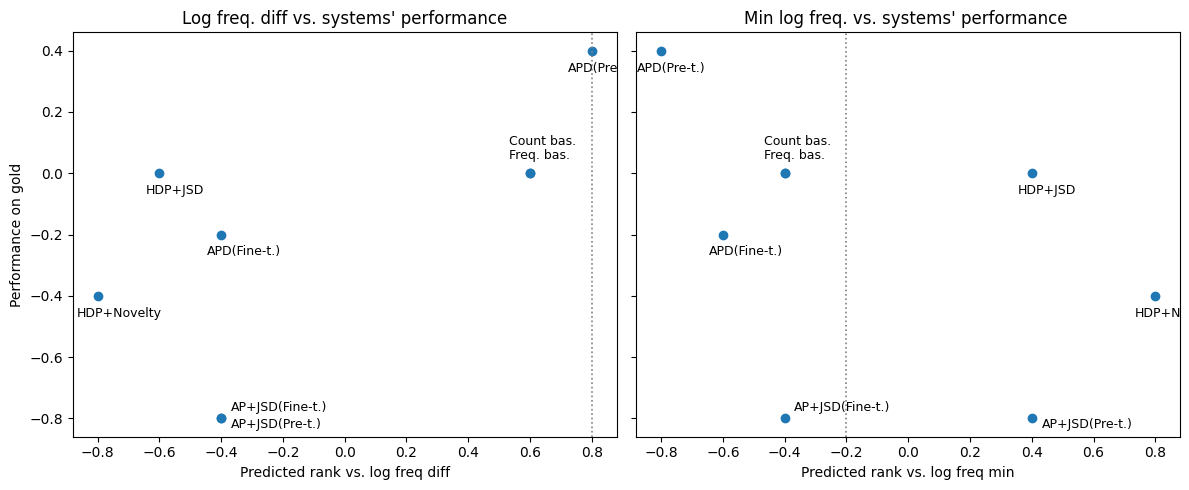

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

offsets = [(7, 5), (7, -7), (-10, -15), (-17.5, -15), (-10, -15), (-15, -15), (-15,10), (-15,20)]
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].scatter(frq_d_corrs, gold_corrs)
axes[0].axvline(gold_vs_frqd, color='grey', linestyle='dotted', linewidth=1.2,
                 label=f'freq. correlation gold rank ({gold_vs_frqd:.2f})')
axes[0].set_xlabel("Predicted rank vs. log freq diff")
axes[0].set_ylabel("Performance on gold")
axes[0].set_title("Log freq. diff vs. systems' performance")

axes[1].scatter(frq_m_corrs, gold_corrs)
axes[1].axvline(gold_vs_frqm, color='grey', linestyle='dotted', linewidth=1.2,
                 label=f'freq. correlation gold rank ({gold_vs_frqm:.2f})')
axes[1].set_xlabel("Predicted rank vs. log freq min")
axes[1].set_title("Min log freq. vs. systems' performance ")

for i, system in enumerate(systems):
    dx, dy = offsets[i % len(offsets)]
    axes[0].annotate(system,
                     (frq_d_corrs[i], gold_corrs[i]),
                     xytext=(dx, dy), textcoords='offset points',
                     fontsize=9, clip_on=True)
    axes[1].annotate(system,
                     (frq_m_corrs[i], gold_corrs[i]),
                     xytext=(dx, dy), textcoords='offset points',
                     fontsize=9, clip_on=True)

plt.tight_layout()
plt.show()
